# PART 1

#### Libraries

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import pandas as pd
import collections
from numpy import linalg as la
import matplotlib.pyplot as plt
import re


#### Load data into memory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
docs_path = '/content/drive/Shareddrives/RIAW Labs/Search Engine Project /data/farmers-protest-tweets.json'

In [ ]:
original_data_tweets = pd.read_json(docs_path, lines=True)
print("The number of tweets in the dataset is: ", len(original_data_tweets))

The number of tweets in the dataset is:  117407


In [ ]:
original_data_tweets.head()

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/ArjunSinghPanam/status/136...,2021-02-24 09:23:35+00:00,The world progresses while the Indian police a...,The world progresses while the Indian police a...,1364506249291784198,"{'username': 'ArjunSinghPanam', 'displayname':...",[https://twitter.com/ravisinghka/status/136415...,[https://t.co/es3kn0IQAF],0,0,...,0,1364506249291784198,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,{'url': 'https://twitter.com/RaviSinghKA/statu...,"[{'username': 'narendramodi', 'displayname': '..."
1,https://twitter.com/PrdeepNain/status/13645062...,2021-02-24 09:23:32+00:00,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,1364506237451313155,"{'username': 'PrdeepNain', 'displayname': 'Pra...",[],[],0,0,...,0,1364506237451313155,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'Kisanektamorcha', 'displayname'..."
2,https://twitter.com/parmarmaninder/status/1364...,2021-02-24 09:23:22+00:00,ਪੈਟਰੋਲ ਦੀਆਂ ਕੀਮਤਾਂ ਨੂੰ ਮੱਦੇਨਜ਼ਰ ਰੱਖਦੇ ਹੋਏ \nਮੇ...,ਪੈਟਰੋਲ ਦੀਆਂ ਕੀਮਤਾਂ ਨੂੰ ਮੱਦੇਨਜ਼ਰ ਰੱਖਦੇ ਹੋਏ \nਮੇ...,1364506195453767680,"{'username': 'parmarmaninder', 'displayname': ...",[],[],0,0,...,0,1364506195453767680,pa,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,None,NaN,None,None
3,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:23:16+00:00,@ReallySwara @rohini_sgh watch full video here...,@ReallySwara @rohini_sgh watch full video here...,1364506167226032128,"{'username': 'anmoldhaliwal', 'displayname': '...",[https://youtu.be/-bUKumwq-J8],[https://t.co/wBPNdJdB0n],0,0,...,0,1364350947099484160,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'ReallySwara', 'displayname': 'S..."
4,https://twitter.com/KotiaPreet/status/13645061...,2021-02-24 09:23:10+00:00,#KisanEktaMorcha #FarmersProtest #NoFarmersNoF...,#KisanEktaMorcha #FarmersProtest #NoFarmersNoF...,1364506144002088963,"{'username': 'KotiaPreet', 'displayname': 'Pre...",[],[],0,0,...,0,1364506144002088963,und,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None


#### Extract fields Tweet | Date | Hashtags| Likes | Retweets | Url


In [ ]:
data_tweets = original_data_tweets
data_tweets.rename(columns={
    'content': 'Tweet',
    'date': 'Date',
    'likeCount': 'Likes',
    'retweetCount': 'Retweets',
    'url': 'Url',
    'lang': 'Language'
}, inplace=True)

data_tweets['Hashtags'] = data_tweets['Tweet'].apply(lambda x: [i for i in x.split() if i.startswith("#")]) # add a column for hashtags

data_tweets.head()

,Url,Date,Tweet,renderedContent,id,user,outlinks,tcooutlinks,replyCount,Retweets,...,conversationId,Language,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers,Hashtags
0,https://twitter.com/ArjunSinghPanam/status/136...,2021-02-24 09:23:35+00:00,The world progresses while the Indian police a...,The world progresses while the Indian police a...,1364506249291784198,"{'username': 'ArjunSinghPanam', 'displayname':...",[https://twitter.com/ravisinghka/status/136415...,[https://t.co/es3kn0IQAF],0,0,...,1364506249291784198,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,{'url': 'https://twitter.com/RaviSinghKA/statu...,"[{'username': 'narendramodi', 'displayname': '...","[#ModiDontSellFarmers, #FarmersProtest, #FreeN..."
1,https://twitter.com/PrdeepNain/status/13645062...,2021-02-24 09:23:32+00:00,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,1364506237451313155,"{'username': 'PrdeepNain', 'displayname': 'Pra...",[],[],0,0,...,1364506237451313155,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'Kisanektamorcha', 'displayname'...","[#FarmersProtest, #ModiIgnoringFarmersDeaths, ..."
2,https://twitter.com/parmarmaninder/status/1364...,2021-02-24 09:23:22+00:00,ਪੈਟਰੋਲ ਦੀਆਂ ਕੀਮਤਾਂ ਨੂੰ ਮੱਦੇਨਜ਼ਰ ਰੱਖਦੇ ਹੋਏ \nਮੇ...,ਪੈਟਰੋਲ ਦੀਆਂ ਕੀਮਤਾਂ ਨੂੰ ਮੱਦੇਨਜ਼ਰ ਰੱਖਦੇ ਹੋਏ \nਮੇ...,1364506195453767680,"{'username': 'parmarmaninder', 'displayname': ...",[],[],0,0,...,1364506195453767680,pa,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,None,NaN,None,None,[#FarmersProtest]
3,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:23:16+00:00,@ReallySwara @rohini_sgh watch full video here...,@ReallySwara @rohini_sgh watch full video here...,1364506167226032128,"{'username': 'anmoldhaliwal', 'displayname': '...",[https://youtu.be/-bUKumwq-J8],[https://t.co/wBPNdJdB0n],0,0,...,1364350947099484160,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'ReallySwara', 'displayname': 'S...","[#farmersprotest, #NoFarmersNoFood]"
4,https://twitter.com/KotiaPreet/status/13645061...,2021-02-24 09:23:10+00:00,#KisanEktaMorcha #FarmersProtest #NoFarmersNoF...,#KisanEktaMorcha #FarmersProtest #NoFarmersNoF...,1364506144002088963,"{'username': 'KotiaPreet', 'displayname': 'Pre...",[],[],0,0,...,1364506144002088963,und,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None,"[#KisanEktaMorcha, #FarmersProtest, #NoFarmers..."


Example of tweet

In [ ]:
for i in range(1):
    print(data_tweets.iloc[i]['Tweet'])


The world progresses while the Indian police and Govt are still trying to take India back to the horrific past through its tyranny. 

@narendramodi @DelhiPolice Shame on you. 

#ModiDontSellFarmers 
#FarmersProtest 
#FreeNodeepKaur https://t.co/es3kn0IQAF


**tweet_document_ids_map**

In [ ]:
tweet_document_ids_map =  pd.read_csv("/content/drive/Shareddrives/RIAW Labs/Search Engine Project /data/tweet_document_ids_map.csv")

In [ ]:
tweet_document_ids_map.head()

,docId,id
0,doc_0,1364506249291784198
1,doc_1,1364506237451313155
2,doc_2,1364506167226032128
3,doc_3,1364505991887347714
4,doc_4,1364505813834989568


In [ ]:
document_id_map = dict(zip(tweet_document_ids_map['id'], tweet_document_ids_map['docId']))


#### Implement a language dictionary to process stop words depending on the language of the tweet

Given that we identified different languages among the tweets in the original data, we decided to apply stop words in the build_terms function according to their respective languages.

In [ ]:
# these are the unique larnguages in the dataset
print(original_data_tweets['Language'].unique())

['en' 'pa' 'und' 'hi' 'ta' 'hu' 'ur' 'et' 'mr' 'tl' 'es' 'de' 'in' 'or'
 'kn' 'ml' 'ht' 'it' 'fr' 'bn' 'sv' 'tr' 'gu' 'te' 'da' 'pt' 'cs' 'sl'
 'nl' 'ca' 'no' 'cy' 'pl' 'eu' 'ne' 'ru' 'lv' 'lt' 'fi' 'ro' 'ar' 'fa'
 'vi' 'is' 'ja' 'si']


In [ ]:
language_dict = {
    'ar': 'arabic',
    'eu': 'basque',
    'bn': 'bengali',
    'ca': 'catalan',
    'da': 'danish',
    'nl': 'dutch',
    'en': 'english',
    'fi': 'finnish',
    'fr': 'french',
    'de': 'german',
    'hu': 'hungarian',
    'in': 'indonesian',
    'it': 'italian',
    'ne': 'nepali',
    'no': 'norwegian',
    'pt': 'portuguese',
    'ro': 'romanian',
    'ru': 'russian',
    'es': 'spanish',
    'sv': 'swedish',
    'tr': 'turkish'
}

#### 1. Pre-process document

In [ ]:
import string
def build_terms(line, lang):

    stemmer = PorterStemmer()
    stop_words = set(stopwords.words(lang)) # get the stop words for the language

    line = re.sub(r'http\S+', '', line)
    words_line= line.split() # tokenize the text, get a list of terms

    #First we deal with # separation
    treated_words = []
    for word in words_line:

        if word and word[0] == "#":  #If its a hashtag
            separated_list = re.split(r'(?<=[a-z])(?=[A-Z])', word[1:])
            for separated_word in separated_list:
                treated_words.append(separated_word)
        else:
            treated_words.append(word)


    line = [word.lower() for word in treated_words] # everything to lowercase
    translator = str.maketrans('', '', string.punctuation)
    line = [word.translate(translator) for word in line]  # remove punctuation

    line= [word for word in line if word not in stop_words] # remove stop_words
    line= [stemmer.stem(word) for word in line ] # steam
    line = [word for word in line if word.isalnum()]  # keeps only words with alphanumeric characters

    return line

In [ ]:
terms = build_terms("hello my #NameBrand is @john. I am a student, #student, ¢¢¢¢¢", 'english')
print(terms)

['hello', 'name', 'brand', 'john', 'student', 'student']


In [ ]:
# input: dataset of tweets, output: preprocessed dataset of tweets
# output: dataframe for each tweet content - build terms (stop words depend on the language)
def preprocess_document(tweets):
    preprocessed_document = tweets.copy() # copy to avoid modifying the original dataset

    for i in range(len(preprocessed_document)):
        twt_content = preprocessed_document.iloc[i]['Tweet']

        if preprocessed_document.iloc[i]['Language'] in language_dict:
            lang = language_dict[preprocessed_document.iloc[i]['Language']]
        else:
            lang = 'english'

        preprocessed_document.at[i, 'Tweet'] = build_terms(twt_content, lang)


    preprocessed_document = preprocessed_document[['Tweet', 'Date', 'Hashtags', 'Likes', 'Retweets', 'Url']]

    return preprocessed_document


In [ ]:
english_tweets_ids = data_tweets[data_tweets['Language'] == 'en']['id'].tolist()
print(english_tweets_ids)

[1364506249291784198, 1364506237451313155, 1364506167226032128, 1364505991887347714, 1364505813834989568, 1364505749359976448, 1364505676375076867, 1364505511073300481, 1364505452134817795, 1364505443997937669, 1364505314586951680, 1364505255946379268, 1364505170743238659, 1364505014530531330, 1364504850524995587, 1364504705460658179, 1364504358277308416, 1364504281618001921, 1364504256934408193, 1364503870651555840, 1364503539322671108, 1364503376885473282, 1364503314407124992, 1364503215232798721, 1364502921858211840, 1364502574280409091, 1364502520412930049, 1364502280167325699, 1364502000809824261, 1364501857788289027, 1364501716960354306, 1364500816418250752, 1364500655730274307, 1364500318420160513, 1364500256851951619, 1364500069945384961, 1364499897404190721, 1364499704147374082, 1364499669271855104, 1364499530515963905, 1364499513520525312, 1364499441927954434, 1364499308414967808, 1364498983813599235, 1364498954092642305, 1364498807157792770, 1364498674223513602, 136449864193

In [ ]:
data_tweets = data_tweets[data_tweets['Language'] == 'en'].reset_index(drop=True)
data_tweets.head()
processed_tweets = preprocess_document(data_tweets)
processed_tweets.head()

,Tweet,Date,Hashtags,Likes,Retweets,Url
0,"[world, progress, indian, polic, govt, still, ...",2021-02-24 09:23:35+00:00,"[#ModiDontSellFarmers, #FarmersProtest, #FreeN...",0,0,https://twitter.com/ArjunSinghPanam/status/136...
1,"[farmer, protest, modi, ignor, farmer, death, ...",2021-02-24 09:23:32+00:00,"[#FarmersProtest, #ModiIgnoringFarmersDeaths, ...",0,0,https://twitter.com/PrdeepNain/status/13645062...
2,"[reallyswara, rohinisgh, watch, full, video, f...",2021-02-24 09:23:16+00:00,"[#farmersprotest, #NoFarmersNoFood]",0,0,https://twitter.com/anmoldhaliwal/status/13645...
3,"[mandeeppunia1, watch, full, video, farmerspro...",2021-02-24 09:22:34+00:00,"[#farmersprotest, #NoFarmersNoFood]",0,0,https://twitter.com/anmoldhaliwal/status/13645...
4,"[mandeeppunia1, watch, full, video, farmerspro...",2021-02-24 09:21:51+00:00,"[#farmersprotest, #NoFarmersNoFood]",0,0,https://twitter.com/anmoldhaliwal/status/13645...


#### 2. Exploratory data analysis

In [70]:
# input: dataset of tweets with the column 'Tweet' containing the preprocessed tweets
# output: list of lists of terms
def preprocess_tweets(lines):
      terms = []
      for line in lines:
         terms.append(line)
      return terms


In [71]:
all_tweets_in_terms = preprocess_tweets(processed_tweets['Tweet'])
print(all_tweets_in_terms[0])

['world', 'progress', 'indian', 'polic', 'govt', 'still', 'tri', 'take', 'india', 'back', 'horrif', 'past', 'tyranni', 'narendramodi', 'delhipolic', 'shame', 'modi', 'dont', 'sell', 'farmer', 'farmer', 'protest', 'free', 'nodeep', 'kaur']


Word counting distribution

In [72]:
def word_count_distribution(processed_tweets):
    all_words = [word for tweet in processed_tweets for word in tweet]
    word_count = collections.Counter(all_words)
    most_common_words = word_count.most_common(10)

    words, counts = zip(*most_common_words)
    plt.bar(words, counts)
    plt.xticks(rotation=90)
    plt.show()

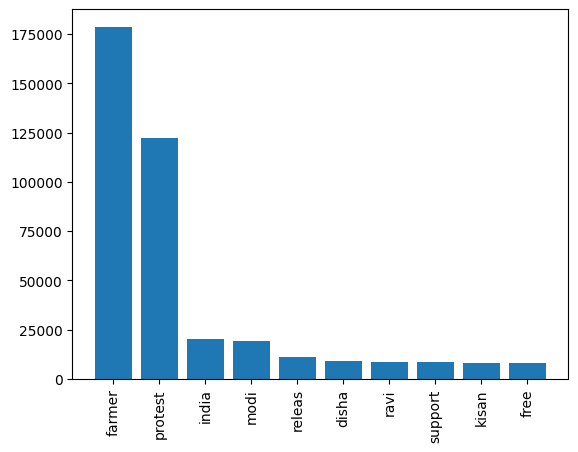

In [73]:
word_count_distribution(all_tweets_in_terms)

Average Sentence Length

In [74]:
def average_sentence_length(processed_tweets):
    lengths = [len(tweet) for tweet in processed_tweets]
    return sum(lengths) / len(lengths) if lengths else 0

In [75]:
average_sentence_length(all_tweets_in_terms)

11.880356367167204

Vocabulary size

In [76]:
def vocabulary_size(processed_terms):
    all_words = [word for tweet in processed_terms for word in tweet]
    return len(set(all_words))

In [77]:
vocabulary_size(all_tweets_in_terms)

57153

Ranking of the most retweeted tweets

In [78]:
def top_retweeted_tweets(data_tweets, top_n):
    # Sort by retweetCount in descending order and select the top N tweets
    top_retweets = data_tweets.sort_values(by='Retweets', ascending=False).head(top_n)
    
    # Extract relevant fields: content, retweet count, and tweet URL
    return top_retweets[['Tweet', 'Retweets', 'Url']]

In [79]:
top_retweeted_tweets(data_tweets, 10)

,Tweet,Retweets,Url
111329,मध्यप्रदेश में निजी व्यापारी 200 करोड़ का धान ...,7723,https://twitter.com/RakeshTikaitBKU/status/136...
7645,There's a #FarmersProtest happening in Germany...,6164,https://twitter.com/dhruv_rathee/status/136414...
89780,"disha ravi, a 21-year-old climate activist, ha...",4673,https://twitter.com/rupikaur_/status/136088206...
88911,Disha Ravi broke down in court room and told j...,3742,https://twitter.com/amaanbali/status/136090860...
111556,Farmers are so sweet. Y’all have to see this @...,3332,https://twitter.com/jedijasmin_/status/1360162...
64492,india is targeting young women to silence diss...,3230,https://twitter.com/rupikaur_/status/136179092...
108072,Bollywood has betrayed Panjab &amp; the farmer...,3182,https://twitter.com/RaviSinghKA/status/1360260...
60721,लहरों को ख़ामोश देख कर ये ना समझना कि समंदर मे...,3057,https://twitter.com/sherryontopp/status/136189...
29510,"हाँ मैं जानता हूँ कि मैं शायर नहीं, और ज़ुल्म ...",3040,https://twitter.com/sherryontopp/status/136309...
24160,"कलियुग है साहब , यहाँ झूठे को स्वीकार किया जा...",2622,https://twitter.com/sherryontopp/status/136337...


Word Clouds for the Most Frequent Words

In [80]:
from wordcloud import WordCloud

def generate_word_clouds(all_tweets_in_terms):
    # Join all the tweets into a single string
    all_words = ' '.join([' '.join(tweet) for tweet in all_tweets_in_terms])
    
    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()

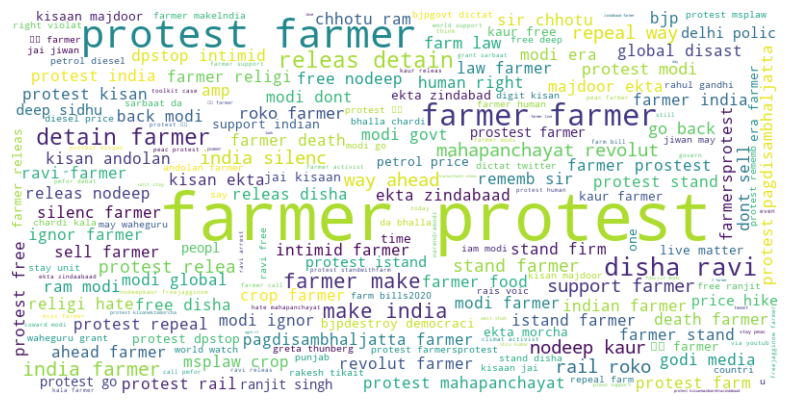

In [81]:
generate_word_clouds(all_tweets_in_terms)

Entity Recognition

In [82]:
import spacy
nlp = spacy.load("en_core_web_sm") #in case of not having it, download through command 'python -m spacy download en_core_web_sm'

In [83]:
def entity_recognition(data_tweets, tweet_id):

    ner_categories = ["PERSON", "ORG", "GPE"]

    doc = nlp(data_tweets[tweet_id])
    
    entities = []
    
    for ent in doc.ents:
        if ent.label_ in ner_categories:
            entities.append((ent.text, ent.label_))
    
    for entity, category in entities:
        print(f"{entity}: {category}")
    
    spacy.displacy.render(doc, style="ent")


In [84]:
entity_recognition(data_tweets['Tweet'], 0)

Govt: ORG
India: GPE


# PART 2

## Indexing

#### Indexing

The next step to build our search engine is to construct the inverted index using the TF-IDF algorithm. Initially, we implemented a function from a previous lab, but it was inefficient for larger datasets. We decided to optimize the code for better performance.



The original function for constructing the inverted index was as follows:

In [ ]:
def create_index_tfidf(tweets_datset, num_documents):
    """
    Implement the inverted index and compute tf, df and idf

    Argument:
    lines -- collection of Wikipedia articles
    num_documents -- total number of documents

    Returns:
    index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding
    list of document these keys appears in (and the positions) as values.
    tf - normalized term frequency for each term in each document
    df - number of documents each term appear in
    idf - inverse document frequency of each term
    """

    index = defaultdict(list)
    tf = defaultdict(list)  #term frequencies of terms in documents (documents in the same order as in the main index)
    df = defaultdict(int)  #document frequencies of terms in the corpus
    idf = defaultdict(float)

    for i in range(len(tweets_datset)):
        if i%1000==0:
            print(f"Procesando tweet {i + 1}/{len(tweets_datset)}")  # Muestra el progreso

        current_tweet_index = {}
        ## ===============================================================
        ## create the index for the **current page** and store it in current_page_index
        ## current_page_index ==> { ‘term1’: [current_doc, [list of positions]], ...,‘term_n’: [current_doc, [list of positions]]}

        ## Example: if the curr_doc has id 1 and its text is
        ##"web retrieval information retrieval":

        ## current_page_index ==> { ‘web’: [1, [0]], ‘retrieval’: [1, [1,4]], ‘information’: [1, [2]]}

        ## the term ‘web’ appears in document 1 in positions 0,
        ## the term ‘retrieval’ appears in document 1 in positions 1 and 4
        ## ===============================================================

        for position, term in enumerate(tweets_datset.iloc[i]['Tweet']):

                try:

                    current_tweet_index[term][1].append(position)

                except:

                    current_tweet_index[term] = [document_id_map[tweets_datset.iloc[i]['id']], array('I', [position])]

        # normalize term frequencies
        # Compute the denominator to normalize term frequencies (formula 2 above)
        # norm is the same for all terms of a document.
        norm = 0
        for term, doc_positions in current_tweet_index.items():
            # posting will contain the list of positions for current term in current document.
            # posting ==> [current_doc, [list of positions]]
            # you can use it to infer the frequency of current term.
            norm += len(doc_positions[1]) ** 2
        norm = math.sqrt(norm)

            #calculate the tf(dividing the term frequency by the above computed norm) and df weights
        for term, doc_positions in current_tweet_index.items():
            # append the tf for current term (tf = term frequency in current doc/norm)
            tf[term].append(np.round(len(doc_positions[1]) / norm, 4)) ## SEE formula (1) above
            #increment the document frequency of current term (number of documents containing the current term)
            df[term] += 1 # increment DF for current term

        #merge the current page index with the main index
        for term, doc_positions in current_tweet_index.items():
            index[term].append(doc_positions)

        # Compute IDF following the formula (3) above. HINT: use np.log
        for term in df:
            idf[term] = np.round(np.log(float(num_documents / df[term])), 4)

    return index, tf, df, idf


To address the performance issues, we restructured the function as follows:

In [ ]:
from collections import defaultdict, Counter
from array import array
import numpy as np
import math


num_documents = len(document_id_map)

index = defaultdict(list)
tf = defaultdict(list)
df = defaultdict(int)
idf = defaultdict(float)

# Convert 'Tweet' column to a list of lists to speed up iteration
tweets = processed_tweets['Tweet'].tolist()

# Iterate over tweets and their document IDs
for i, tweet in enumerate(tweets):
    current_tweet_index = defaultdict(lambda: [document_id_map[english_tweets_ids[i]], array('I')])
    term_counts = Counter(tweet)  # Count term frequencies in the current tweet

    # Calculate normalized term frequencies and update current_tweet_index
    norm = math.sqrt(sum((count ** 2 for count in term_counts.values())))

    for position, term in enumerate(tweet):
        current_tweet_index[term][1].append(position)  # Store position for term

    for term, (doc_id, positions) in current_tweet_index.items():
        # Calculate term frequency (TF)
        tf_value = len(positions) / norm
        tf[term].append(np.round(tf_value, 4))

        # Update document frequency (DF)
        df[term] += 1

        # Update main index
        index[term].append([doc_id, positions])

# Calculate IDF for all terms
for term in df:
    idf[term] = np.round(np.log(float(num_documents) / df[term]), 4)


In [ ]:
#Represent the query as a weighted tf-idf vector
#Represent each document as a weighted tfidf vector
#Compute the cosine similarity score for the
#query vector and each document vector
#Rank documents with respect to the query by score
#Return the top K (e.g., K = 10) to the user

def rank_documents(terms, docs, index, idf, tf):
    """
    Perform the ranking of the results of a search based on the tf-idf weights

    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    title_index -- mapping between page id and page title

    Returns:
    Print the list of ranked documents
    """

    # I'm interested only on the element of the docVector corresponding to the query terms
    # The remaining elements would become 0 when multiplied to the query_vector
    doc_vectors = defaultdict(lambda: [0] * len(terms)) # I call doc_vectors[k] for a nonexistent key k, the key-value pair (k,[0]*len(terms)) will be automatically added to the dictionary
    query_vector = [0] * len(terms)

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms)  # get the frequency of each term in the query.
    # Example: collections.Counter(["hello","hello","world"]) --> Counter({'hello': 2, 'world': 1})
    #HINT: use when computing tf for query_vector

    query_norm = la.norm(list(query_terms_count.values()))

    for termIndex, term in enumerate(terms):  #termIndex is the index of the term in the query
        if term not in index:
            continue

        # TODO: check how to vectorize the query
        # query_vector[termIndex]=idf[term]  # original
        ## Compute tf*idf(normalize TF as done with documents)
        query_vector[termIndex] = query_terms_count[term] / query_norm * idf[term]

        # Generate doc_vectors for matching docs
        for doc_index, (doc, doc_positions) in enumerate(index[term]):
            # Example of [doc_index, (doc, postings)]
            # 0 (26, array('I', [1, 4, 12, 15, 22, 28, 32, 43, 51, 68, 333, 337]))
            # 1 (33, array('I', [26, 33, 57, 71, 87, 104, 109]))
            # term is in doc 26 in positions 1,4, .....
            # term is in doc 33 in positions 26,33, .....

            #tf[term][0] will contain the tf of the term "term" in the doc 26
            if doc in docs:
                doc_vectors[doc][termIndex] = tf[term][doc_index] * idf[term]  # TODO: check if multiply for idf

    # Calculate the score of each doc
    # compute the cosine similarity between queyVector and each docVector:
    # HINT: you can use the dot product because in case of normalized vectors it corresponds to the cosine similarity
    # see np.dot

    doc_scores = [[np.dot(curDocVec, query_vector), doc] for doc, curDocVec in doc_vectors.items()]
    doc_scores.sort(reverse=True)
    print(doc_scores)

    result_docs = [x[1] for x in doc_scores]
    #print document titles instead if document id's
    #result_docs=[ title_index[x] for x in result_docs ]
    if len(result_docs) == 0:
        print("No results found, try again")
        query = input()
        docs = search_tf_idf(query, index)
    #print ('\n'.join(result_docs), '\n')
    return result_docs

In [ ]:
def search_tf_idf(query, index):
    """
    output is the list of documents that contain any of the query terms.
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = build_terms(query,'english')
    docs = set()
    i=0
    for term in query:
        try:
            # store in term_docs the ids of the docs that contain "term"
            term_docs = [posting[0] for posting in index[term]]

            if i == 0:
                docs = set(term_docs)
                i = 1
            #docs = docs intersection term_docs
            else: docs &= set(term_docs)

        except:
            #term is not in index
            pass

    docs = list(docs)

    ranked_docs = rank_documents(query, docs, index, idf, tf)

    #print( ranked_docs)
    return ranked_docs

In [ ]:
print("Insert your query :\n")
query = input()
ranked_docs = search_tf_idf(query, index)
top = 10

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs)))
for d_id in ranked_docs[:top]:
    print("doc_id= {} ".format(d_id))

Insert your query :

Farmer Protest
[[0.002907914242527305, 'doc_32542'], [0.0029021281517856287, 'doc_22865'], [0.0029011321777421915, 'doc_7859'], [0.0029011321777421915, 'doc_6060'], [0.0029011321777421915, 'doc_5727'], [0.0029011321777421915, 'doc_5183'], [0.0029011321777421915, 'doc_46137'], [0.0029011321777421915, 'doc_45189'], [0.0029011321777421915, 'doc_43199'], [0.0029011321777421915, 'doc_42188'], [0.0029011321777421915, 'doc_41473'], [0.0029011321777421915, 'doc_41062'], [0.0029011321777421915, 'doc_39735'], [0.0029011321777421915, 'doc_36095'], [0.0029011321777421915, 'doc_33482'], [0.0029011321777421915, 'doc_33280'], [0.0029011321777421915, 'doc_33115'], [0.0029011321777421915, 'doc_32750'], [0.0029011321777421915, 'doc_3109'], [0.0029011321777421915, 'doc_30242'], [0.0029011321777421915, 'doc_29960'], [0.0029011321777421915, 'doc_28677'], [0.0029011321777421915, 'doc_27811'], [0.0029011321777421915, 'doc_27726'], [0.0029011321777421915, 'doc_27103'], [0.0029011321777421

In [ ]:
inverse_document_id_map = dict(zip(tweet_document_ids_map['docId'], tweet_document_ids_map['id']))


In [ ]:
original_ids = [inverse_document_id_map[d_id] for d_id in ranked_docs[:top]]
indices = data_tweets[data_tweets['id'].isin(original_ids)].index
tweets_finales = processed_tweets.iloc[indices]
print(tweets_finales)


                                                   Tweet  \
5183                                   [farmer, protest]   
5727                  [farmer, protest, farmer, protest]   
6060                                   [farmer, protest]   
7859                  [farmer, protest, farmer, protest]   
22865  [largest, protest, kanganateam, farmer, protes...   
32542      [timesnow, farmer, protest, protest, protest]   
42188                                  [farmer, protest]   
43199                                  [farmer, protest]   
45189                                  [farmer, protest]   
46137                                  [farmer, protest]   

                           Date  \
5183  2021-02-22 22:32:21+00:00   
5727  2021-02-22 16:13:08+00:00   
6060  2021-02-22 12:50:47+00:00   
7859  2021-02-22 02:00:20+00:00   
22865 2021-02-17 18:28:33+00:00   
32542 2021-02-15 14:12:46+00:00   
42188 2021-02-13 11:18:49+00:00   
43199 2021-02-13 05:07:42+00:00   
45189 2021-02-12 15:58:0

"for d_id in ranked_docs[:top]:\n    original_id = inverse_document_id_map[d_id]\n    indice = data_tweets[data_tweets['id'] == original_id].index\n    fila = processed_tweets.iloc[indice]\n    print(fila)"

#### TNSE

In [ ]:
import multiprocessing
from gensim.models import Word2Vec


from sklearn.manifold import TSNE
import numpy as np

data = processed_tweets['Tweet']
print(data)

0        [world, progress, indian, polic, govt, still, ...
1        [farmer, protest, modi, ignor, farmer, death, ...
2        [reallyswara, rohinisgh, watch, full, video, f...
3        [mandeeppunia1, watch, full, video, farmerspro...
4        [mandeeppunia1, watch, full, video, farmerspro...
                               ...                        
48424    [modi, want, make, slave, free, india, come, j...
48425    [farmer, agit, longer, confin, border, one, st...
48426    [first, mahapanchayat, punjab, revolut, gain, ...
48427    [unit, stand, divid, fall, mahapanchayat, revo...
48428    [kisanektamorcha, keep, morcha, aliv, strong, ...
Name: Tweet, Length: 48429, dtype: object


In [ ]:
import multiprocessing
from gensim.models import Word2Vec


from sklearn.manifold import TSNE
import numpy as np

data = processed_tweets['Tweet']
print(data)
model = Word2Vec(data, window=5, min_count=5, workers=multiprocessing.cpu_count())

words=list(model.wv.index_to_key)
print(words)

print(model.wv['farmer'])

0        [world, progress, indian, polic, govt, still, ...
1        [farmer, protest, modi, ignor, farmer, death, ...
2        [reallyswara, rohinisgh, watch, full, video, f...
3        [mandeeppunia1, watch, full, video, farmerspro...
4        [mandeeppunia1, watch, full, video, farmerspro...
                               ...                        
48424    [modi, want, make, slave, free, india, come, j...
48425    [farmer, agit, longer, confin, border, one, st...
48426    [first, mahapanchayat, punjab, revolut, gain, ...
48427    [unit, stand, divid, fall, mahapanchayat, revo...
48428    [kisanektamorcha, keep, morcha, aliv, strong, ...
Name: Tweet, Length: 48429, dtype: object
['farmer', 'protest', 'india', 'modi', 'support', 'disha', 'ravi', 'releas', 'right', 'stand', 'amp', 'free', 'make', 'law', 'peopl', 'farm', 'indian', 'repeal', 'bjp', 'farmersprotest', 'detain', 'go', 'human', 'govern', 'silenc', 'kisan', 'revolut', 'govt', 'way', 'world', 'delhi', 'mahapanchayat', 'thank'

In [ ]:
print(model.wv['farmer'])

[-0.8102957   0.2618334   0.8918676  -0.06767294  0.56045157 -0.9858518
  0.80591416  0.16014314  0.2548356   0.1930234   1.5862317   0.14496033
  0.2877727  -0.14814053 -0.2650403  -0.6690193   0.8960199   0.2575949
  0.3201867  -0.60504323  1.1974939  -0.0140938   0.5508737   0.50993866
  0.20442455  0.21301873 -0.21454617 -0.21113239 -0.17473501 -0.39202377
 -0.3636043  -0.32570627 -0.7168867   0.7079975   1.0433404   0.16586031
  1.1488253  -0.2932556   0.26584333  0.9688709  -0.65826374  0.26151526
 -1.3506787   0.46038145 -0.69139665  0.44286144 -0.51054925  0.22303668
  1.1928465   0.72005343  0.11505359  0.5513009   1.1184659  -0.15108535
 -0.00760236 -0.08723183  0.81308377  0.19185309  0.3666345   0.77422816
 -0.6846749   0.41146547  0.14136773 -1.7956593   0.58632994  0.45630875
 -0.58735853  0.2810279   0.26765344 -1.6035405   0.07173382 -0.47895584
  0.34642684  0.34920487 -0.655811   -0.17869727 -0.2333072   1.7451488
  0.28018543 -0.6502301   0.06000979  0.31267357  0.17

In [ ]:
words_ak = []
embeddings_ak = []

for word in words:
    embeddings_ak.append(model.wv[word])
    words_ak.append(word)

#print(embeddings_ak)
#print(words_ak)

In [ ]:
tsne_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)



In [ ]:
word_vectors = model.wv  # Accede a los vectores de Word2Vec
X = np.array([word_vectors[word] for word in model.wv.index_to_key])


In [ ]:
embeddings_ak_2d = tsne_2d.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


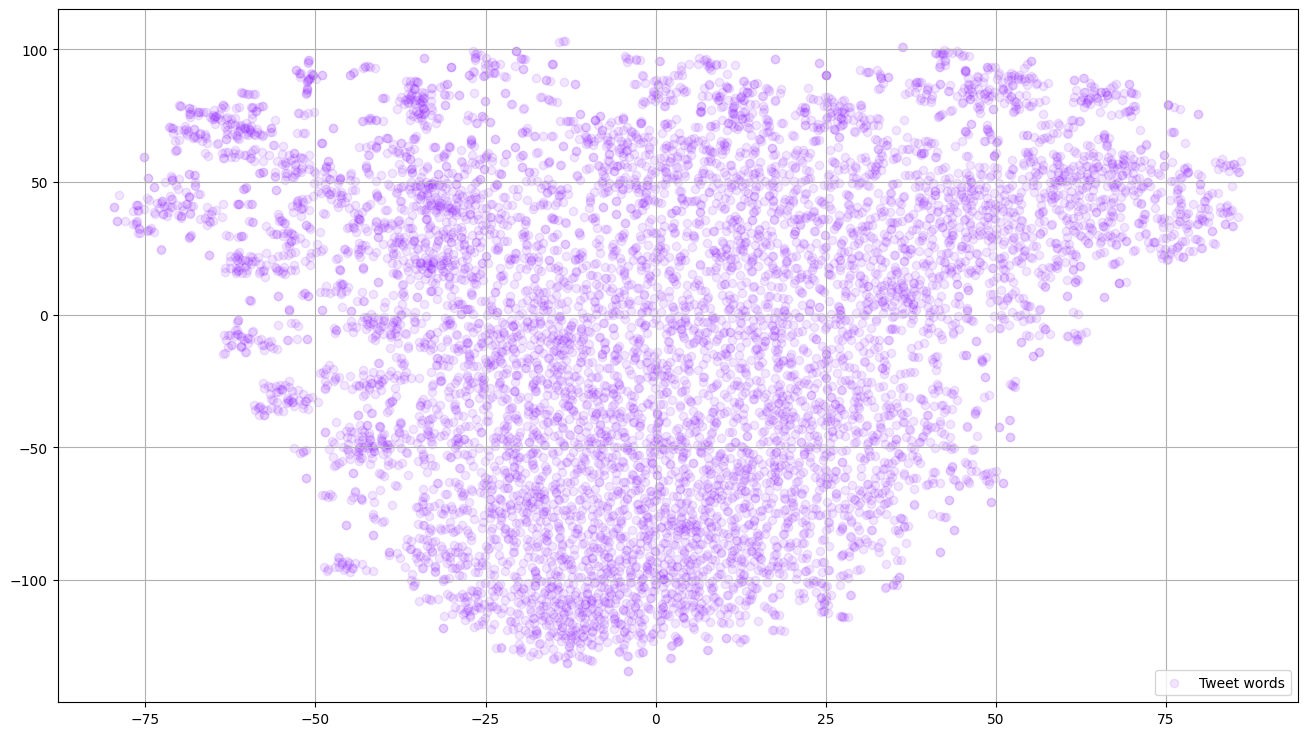

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("hhh.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('Tweet words', embeddings_ak_2d, a=0.1)